In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!unzip '/content/drive/MyDrive/train.zip'

In [37]:
# import necessary lib
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import os

In [2]:
dataset = r'/content/train'

In [7]:
dirls = os.listdir(dataset)
len(dirls)

25000

In [8]:
# Image paths
arr_imgs = [dataset+'/'+i for i in dirls]

In [9]:
# Labels
import re
labels =[]
for i in dirls:
  if re.match('cat',i):
    labels.append(1)
  elif re.match('dog', i):
    labels.append(0)

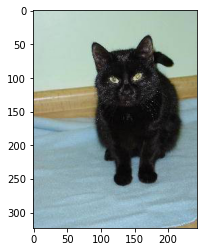

In [10]:
plt.imshow(plt.imread(arr_imgs[0]))
plt.show()

In [11]:
# Dataframe 
df = pd.DataFrame({'Images':arr_imgs, 'Labels':labels}, dtype=str)
df.head()

,Images,Labels
0,/content/train/cat.3602.jpg,1
1,/content/train/cat.11689.jpg,1
2,/content/train/cat.9317.jpg,1
3,/content/train/dog.7824.jpg,0
4,/content/train/cat.10581.jpg,1


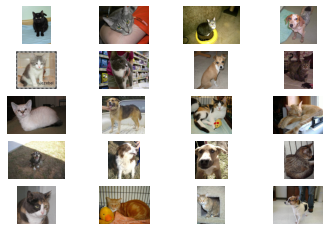

In [12]:
# Display Images
for i in range(0, 20):
  val = np.random.randint(0, len(df))
  plt.subplot(5, 4, i+1)
  plt.imshow(plt.imread(df['Images'][i]))
  plt.axis('off')
plt.show()


In [13]:
df.head()

,Images,Labels
0,/content/train/cat.3602.jpg,1
1,/content/train/cat.11689.jpg,1
2,/content/train/cat.9317.jpg,1
3,/content/train/dog.7824.jpg,0
4,/content/train/cat.10581.jpg,1


In [14]:
df_train = df.iloc[0:20000]
df_test = df.iloc[20000:25000]
print(df_train.shape, df_test.shape)

(20000, 2) (5000, 2)


In [15]:
# train test split
Train, Train_new = train_test_split(df_train, train_size=0.9, random_state=0)
valid, Test = train_test_split(df_test, train_size=0.9, random_state=0)
print(Train.shape, Test.shape, valid.shape, Train_new.shape)

(18000, 2) (500, 2) (4500, 2) (2000, 2)


In [16]:
# Image DataGenerator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [17]:
type(df['Labels'][0])

str

In [18]:
# train_gen, test_gen, valid_gen
train_gen = train_datagen.flow_from_dataframe(dataframe=Train, x_col='Images', y_col='Labels',
                                             batch_size=50, target_size=(64, 64), class_mode='binary',shuffle=True)
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='Images', y_col='Labels',
                                             batch_size=50, target_size=(64, 64), class_mode='binary',shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe=Test, x_col='Images', y_col='Labels',
                                             batch_size=50, target_size=(64, 64), class_mode='binary',shuffle=True)

Found 18000 validated image filenames belonging to 2 classes.
Found 4500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


In [21]:
# Network 1 with Dropouts 
network1 = Sequential()
network1.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
network1.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
network1.add(MaxPool2D(pool_size=(4,4)))
network1.add(Dropout(0.2))
network1.add(Conv2D( filters=128, kernel_size=5, padding='same', activation='relu'))
network1.add(MaxPool2D(pool_size=(4,4)))
network1.add(Dropout(0.2))
network1.add(Flatten())
network1.add(Dense(1, activation='sigmoid'))
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)        

In [58]:
# Using SGD Optimizer
network1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])
history1 = network1.fit(train_gen, epochs=20, validation_data=valid_gen,validation_steps=len(valid_gen), verbose=2)

Epoch 1/20
360/360 - 69s - loss: 0.3013 - accuracy: 0.8725 - val_loss: 0.4494 - val_accuracy: 0.8000
Epoch 2/20
360/360 - 68s - loss: 0.2567 - accuracy: 0.8924 - val_loss: 0.3944 - val_accuracy: 0.8313
Epoch 3/20
360/360 - 68s - loss: 0.2132 - accuracy: 0.9176 - val_loss: 0.5109 - val_accuracy: 0.7787
Epoch 4/20
360/360 - 68s - loss: 0.1789 - accuracy: 0.9351 - val_loss: 0.4296 - val_accuracy: 0.8247
Epoch 5/20
360/360 - 68s - loss: 0.1418 - accuracy: 0.9531 - val_loss: 0.5267 - val_accuracy: 0.7902
Epoch 6/20
360/360 - 68s - loss: 0.1076 - accuracy: 0.9713 - val_loss: 0.4268 - val_accuracy: 0.8291
Epoch 7/20
360/360 - 68s - loss: 0.0804 - accuracy: 0.9819 - val_loss: 0.4314 - val_accuracy: 0.8342
Epoch 8/20
360/360 - 68s - loss: 0.0609 - accuracy: 0.9898 - val_loss: 0.4323 - val_accuracy: 0.8331
Epoch 9/20
360/360 - 67s - loss: 0.0443 - accuracy: 0.9948 - val_loss: 0.4504 - val_accuracy: 0.8376
Epoch 10/20
360/360 - 67s - loss: 0.0310 - accuracy: 0.9982 - val_loss: 0.4974 - val_accura

In [59]:
network1.evaluate(test_gen)

10/10 [==============================] - 2s 149ms/step - loss: 0.4994 - accuracy: 0.8200


[0.4993716776371002, 0.8199999928474426]

In [53]:
# Network 2 with Batch Normalization 
network2 = Sequential()
network2.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
network2.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
network2.add(MaxPool2D(pool_size=(4,4)))
network2.add(BatchNormalization())
network2.add(Conv2D( filters=128, kernel_size=5, padding='same', activation='relu'))
network2.add(MaxPool2D(pool_size=(4,4)))
network2.add(BatchNormalization())
network2.add(Flatten())
network2.add(Dense(1, activation='sigmoid'))
network2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 4, 128)       

In [54]:
# Using Adam Optimizer
network2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
history2 = network2.fit(train_gen, validation_data = valid_gen, epochs=20, verbose=2)

Epoch 1/20
360/360 - 146s - loss: 0.7779 - accuracy: 0.6197 - val_loss: 1.9252 - val_accuracy: 0.4993
Epoch 2/20
360/360 - 65s - loss: 0.5243 - accuracy: 0.7397 - val_loss: 0.5052 - val_accuracy: 0.7544
Epoch 3/20
360/360 - 65s - loss: 0.4305 - accuracy: 0.7993 - val_loss: 0.6128 - val_accuracy: 0.7102
Epoch 4/20
360/360 - 67s - loss: 0.3747 - accuracy: 0.8302 - val_loss: 0.4598 - val_accuracy: 0.7904
Epoch 5/20
360/360 - 68s - loss: 0.3315 - accuracy: 0.8519 - val_loss: 0.4427 - val_accuracy: 0.8133
Epoch 6/20
360/360 - 68s - loss: 0.2905 - accuracy: 0.8747 - val_loss: 0.4281 - val_accuracy: 0.8091
Epoch 7/20
360/360 - 68s - loss: 0.2377 - accuracy: 0.9010 - val_loss: 0.4897 - val_accuracy: 0.8064
Epoch 8/20
360/360 - 68s - loss: 0.2142 - accuracy: 0.9097 - val_loss: 0.5150 - val_accuracy: 0.8204
Epoch 9/20
360/360 - 68s - loss: 0.1743 - accuracy: 0.9286 - val_loss: 0.5609 - val_accuracy: 0.8156
Epoch 10/20
360/360 - 68s - loss: 0.1375 - accuracy: 0.9455 - val_loss: 0.6789 - val_accur

In [55]:
network2.evaluate(test_gen)

10/10 [==============================] - 1s 147ms/step - loss: 1.1493 - accuracy: 0.8100


[1.1493414640426636, 0.8100000023841858]

In [43]:
# Network 3 with L2 Regualrizer 
network3 = Sequential()
network3.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3), 
                    kernel_regularizer= regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
network3.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', 
                    kernel_regularizer= regularizers.l2(0.01),bias_regularizer=regularizers.l2(0.01)))
network3.add(MaxPool2D(pool_size=(4,4)))
network3.add(Conv2D( filters=128, kernel_size=5, padding='same', activation='relu', 
                    kernel_regularizer= regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
network3.add(MaxPool2D(pool_size=(4,4)))
network3.add(Flatten())
network3.add(Dense(1, activation='sigmoid'))
network3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [44]:
# Using Adam Optimizer
network3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
history3 = network3.fit(train_gen, validation_data = valid_gen, epochs=20, verbose=2)

Epoch 1/20
360/360 - 68s - loss: 1.0820 - accuracy: 0.5017 - val_loss: 0.7272 - val_accuracy: 0.4989
Epoch 2/20
360/360 - 66s - loss: 0.7100 - accuracy: 0.5008 - val_loss: 0.7180 - val_accuracy: 0.4989
Epoch 3/20
360/360 - 66s - loss: 0.7354 - accuracy: 0.4950 - val_loss: 0.7186 - val_accuracy: 0.5011
Epoch 4/20
360/360 - 65s - loss: 0.6974 - accuracy: 0.5059 - val_loss: 0.6948 - val_accuracy: 0.5011
Epoch 5/20
360/360 - 65s - loss: 0.8442 - accuracy: 0.5017 - val_loss: 0.8339 - val_accuracy: 0.5011
Epoch 6/20
360/360 - 65s - loss: 0.8031 - accuracy: 0.5001 - val_loss: 0.7310 - val_accuracy: 0.5011
Epoch 7/20
360/360 - 66s - loss: 0.7105 - accuracy: 0.4983 - val_loss: 0.7020 - val_accuracy: 0.5011
Epoch 8/20
360/360 - 66s - loss: 0.6972 - accuracy: 0.4960 - val_loss: 0.6973 - val_accuracy: 0.5011
Epoch 9/20
360/360 - 65s - loss: 0.6961 - accuracy: 0.5041 - val_loss: 0.6960 - val_accuracy: 0.5011
Epoch 10/20
360/360 - 65s - loss: 2.1652 - accuracy: 0.5028 - val_loss: 2.3789 - val_accura

In [51]:
network3.evaluate(test_gen)

10/10 [==============================] - 2s 150ms/step - loss: 0.7003 - accuracy: 0.5360


[0.7002960443496704, 0.5360000133514404]

In [46]:
# Using SGD Optimizer
network4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), metrics=['accuracy'])
history4 = network4.fit(train_gen, validation_data = valid_gen, epochs=20, verbose=2)

Epoch 1/20
360/360 - 68s - loss: 0.6718 - accuracy: 0.6583 - val_loss: 0.5976 - val_accuracy: 0.6631
Epoch 2/20
360/360 - 64s - loss: 0.5419 - accuracy: 0.7381 - val_loss: 0.4864 - val_accuracy: 0.7649
Epoch 3/20
360/360 - 64s - loss: 0.4828 - accuracy: 0.7747 - val_loss: 0.5293 - val_accuracy: 0.7498
Epoch 4/20
360/360 - 64s - loss: 0.4405 - accuracy: 0.7980 - val_loss: 0.4754 - val_accuracy: 0.7831
Epoch 5/20
360/360 - 63s - loss: 0.4070 - accuracy: 0.8166 - val_loss: 0.4076 - val_accuracy: 0.8120
Epoch 6/20
360/360 - 63s - loss: 0.3764 - accuracy: 0.8311 - val_loss: 0.4447 - val_accuracy: 0.8038
Epoch 7/20
360/360 - 64s - loss: 0.3463 - accuracy: 0.8493 - val_loss: 0.5376 - val_accuracy: 0.7551
Epoch 8/20
360/360 - 64s - loss: 0.3252 - accuracy: 0.8565 - val_loss: 0.4521 - val_accuracy: 0.7953
Epoch 9/20
360/360 - 64s - loss: 0.3055 - accuracy: 0.8673 - val_loss: 0.4546 - val_accuracy: 0.8142
Epoch 10/20
360/360 - 64s - loss: 0.2889 - accuracy: 0.8774 - val_loss: 0.4129 - val_accura

In [45]:
# Network 4 with Batch Normalization and dropout
network4 = Sequential()
network4.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
network4.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
network4.add(MaxPool2D(pool_size=(4,4)))
network4.add(BatchNormalization())
network4.add(Dropout(0.2))
network4.add(Conv2D( filters=128, kernel_size=5, padding='same', activation='relu'))
network4.add(MaxPool2D(pool_size=(4,4)))
network4.add(BatchNormalization())
network4.add(Dropout(0.2))
network4.add(Flatten())
network4.add(Dense(1, activation='sigmoid'))
network4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 128)       

In [50]:
network4.evaluate(test_gen)

10/10 [==============================] - 2s 147ms/step - loss: 0.3846 - accuracy: 0.8620


[0.3846307694911957, 0.8619999885559082]

In [47]:
# Network 5 with Batch Normalization and dropout
network5 = Sequential()
network5.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
network5.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
network5.add(MaxPool2D(pool_size=(4,4)))
network5.add(BatchNormalization())
network5.add(Dropout(0.2))
network5.add(Conv2D( filters=128, kernel_size=5, padding='same', activation='relu'))
network5.add(Conv2D( filters=256, kernel_size=5, padding='same', activation='relu'))
network5.add(MaxPool2D(pool_size=(4,4)))
network5.add(BatchNormalization())
network5.add(Dropout(0.2))
network5.add(Flatten())
network5.add(Dense(1, activation='sigmoid'))
network5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 256)     

In [48]:
# Using Adam Optimizer
network5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
history5 = network5.fit(train_gen, validation_data = valid_gen, epochs=20, verbose=2)

Epoch 1/20
360/360 - 68s - loss: 0.9694 - accuracy: 0.5694 - val_loss: 0.7000 - val_accuracy: 0.5676
Epoch 2/20
360/360 - 66s - loss: 0.6656 - accuracy: 0.6236 - val_loss: 0.6565 - val_accuracy: 0.6016
Epoch 3/20
360/360 - 67s - loss: 0.5867 - accuracy: 0.6912 - val_loss: 1.4794 - val_accuracy: 0.5029
Epoch 4/20
360/360 - 67s - loss: 0.5452 - accuracy: 0.7283 - val_loss: 0.5091 - val_accuracy: 0.7504
Epoch 5/20
360/360 - 70s - loss: 0.4646 - accuracy: 0.7807 - val_loss: 1.1959 - val_accuracy: 0.5758
Epoch 6/20
360/360 - 71s - loss: 0.4528 - accuracy: 0.7833 - val_loss: 0.4405 - val_accuracy: 0.7911
Epoch 7/20
360/360 - 70s - loss: 0.3882 - accuracy: 0.8246 - val_loss: 0.4241 - val_accuracy: 0.8000
Epoch 8/20
360/360 - 70s - loss: 0.3610 - accuracy: 0.8388 - val_loss: 0.3929 - val_accuracy: 0.8262
Epoch 9/20
360/360 - 70s - loss: 0.3369 - accuracy: 0.8471 - val_loss: 0.4016 - val_accuracy: 0.8204
Epoch 10/20
360/360 - 70s - loss: 0.3143 - accuracy: 0.8617 - val_loss: 0.3615 - val_accura

In [49]:
network5.evaluate(test_gen)

10/10 [==============================] - 2s 147ms/step - loss: 0.8508 - accuracy: 0.8140


[0.8508457541465759, 0.8140000104904175]

In [60]:
histories = [history1, history2, history3, history4, history5]

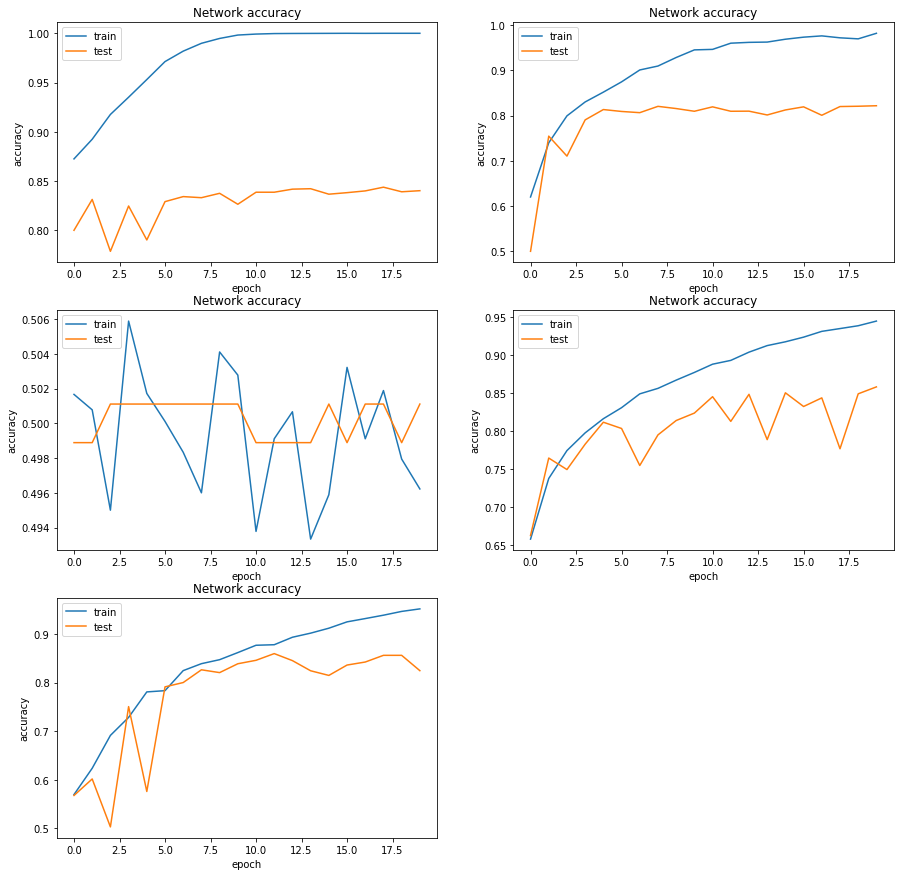

In [72]:
# Train Accuracy and Test Accuracy
plt.figure(figsize=(15, 15))
for i in range(len(histories)):
  plt.subplot(3,2, i+1)
  plt.plot(histories[i].history['accuracy'])
  plt.plot(histories[i].history['val_accuracy'])
  plt.title('Network accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
plt.show()

